# Tsunamis from year 1800 to 2021



In [1]:
!pip install folium

In [2]:
!pip install pandas

![title](unnamed.png)

## About Tsunamis
Tsunamis are caused by earthquakes, volcanic eruptions, or landslides in seas and oceans. Such movements can transport vast amounts of water, creating huge waves. A tsunami is usually a series of waves, although frequently, the first wave is not the most destructive. Their destruction power is enormous, also illustrated by the fact that they can reach a width of up to 100 kilometres, a height of up to 30 meters, and a speed of up to 800 kilometres per hour (in the deep ocean). 

## Load Data

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt2
import folium

In [12]:

tsunamis = pd.read_csv('Data/Historical_Tsunami.csv')

I have added column 'Earthquake Mayor/Great'where 1 ('yes') represents Earthquakes above 7.0 magnitude in the Richter scale. These are Earthquakes which cause serious or severe destruction and loss of life over large areas.

I have added column 'Earthquake Mayor/Great'where 1 ('yes') represents Earthquakes above 7.0 magnitude in the Richter scale. These are Earthquakes which cause serious or severe destruction and loss of life over large areas.

In [14]:
tsunamis.shape

(26824, 104)

In [17]:
tsunamis.head()

,X,Y,FID,ID,TSEVENT_ID,YEAR,MONTH,DAY,DATE_STRIN,ARR_DAY,...,INJURIES_1,INJURIES_2,MISSING_TO,MISSING__1,MISSING__2,MAP_VOL_ID,HOUSES_D_5,HOUSES_D_6,HOUSES_D_7,NUM_DEPOSI
0,95.247,5.283,4001,15817,2439,2004,12,26,2004/12/26,0,...,0,,0,0,,0,0,0,,0
1,95.242,5.355,4002,15818,2439,2004,12,26,2004/12/26,0,...,0,,0,0,,0,0,0,,0
2,95.235,5.436,4003,15820,2439,2004,12,26,2004/12/26,0,...,0,,0,0,,0,0,0,,0
3,97.750,0.550,4004,869,904,1861,2,16,1861/02/16,0,...,0,,0,0,,0,0,0,,0
4,96.100,4.150,4005,866,904,1861,2,16,1861/02/16,0,...,0,,0,0,,0,0,0,,0


In [21]:
tsunamis.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26824 entries, 0 to 26823
Data columns (total 104 columns):
 #    Column      Dtype  
---   ------      -----  
 0    X           float64
 1    Y           float64
 2    FID         int64  
 3    ID          int64  
 4    TSEVENT_ID  int64  
 5    YEAR        int64  
 6    MONTH       int64  
 7    DAY         int64  
 8    DATE_STRIN  object 
 9    ARR_DAY     int64  
 10   ARR_HOUR    int64  
 11   ARR_MIN     int64  
 12   TRAV_HOURS  int64  
 13   TRAV_MINS   int64  
 14   PERIOD      float64
 15   FIRST_MOTI  object 
 16   LATITUDE    float64
 17   LONGITUDE   float64
 18   LOCATION_N  object 
 19   AREA        object 
 20   COUNTRY     object 
 21   REGION_COD  int64  
 22   RUNUP_HT    float64
 23   RUNUP_HT_R  int64  
 24   RUNUP_HORI  float64
 25   TYPE_MEASU  int64  
 26   TYPE_MEA_1  object 
 27   DAMAGE_MIL  float64
 28   DAMAGE_AMO  int64  
 29   DAMAGE_DES  object 
 30   DEATHS      int64  
 31   DEATHS_AMO  int64  
 32   

In [24]:
tsunamis['EQ_MAGNITU']=0

In [36]:
tsunamis.loc[tsunamis['EQ_MAGNITU']>7,'Earthquake Mayor/Great'] = 1
tsunamis

,X,Y,FID,ID,TSEVENT_ID,YEAR,MONTH,DAY,DATE_STRIN,ARR_DAY,...,INJURIES_2,MISSING_TO,MISSING__1,MISSING__2,MAP_VOL_ID,HOUSES_D_5,HOUSES_D_6,HOUSES_D_7,NUM_DEPOSI,Earthquake Mayor/Great
0,95.247000,5.283000,4001,15817,2439,2004,12,26,2004/12/26,0,...,,0,0,,0,0,0,,0,NaN
1,95.242000,5.355000,4002,15818,2439,2004,12,26,2004/12/26,0,...,,0,0,,0,0,0,,0,NaN
2,95.235000,5.436000,4003,15820,2439,2004,12,26,2004/12/26,0,...,,0,0,,0,0,0,,0,NaN
3,97.750000,0.550000,4004,869,904,1861,2,16,1861/02/16,0,...,,0,0,,0,0,0,,0,NaN
4,96.100000,4.150000,4005,866,904,1861,2,16,1861/02/16,0,...,,0,0,,0,0,0,,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26819,166.617000,19.283000,26820,25495,5463,2012,8,31,2012/08/31,31,...,,0,0,,0,0,0,,0,NaN
26820,-153.480000,57.130000,26821,465,549,1788,7,21,1788/07/21,0,...,,0,0,,0,0,0,,0,NaN
26821,-134.647000,56.247000,26822,25668,5472,2013,1,5,2013/01/05,5,...,,0,0,,0,0,0,,0,NaN
26822,-135.342000,57.052000,26823,25669,5472,2013,1,5,2013/01/05,5,...,,0,0,,0,0,0,,0,NaN


## Total Damage

In [45]:
tsunamis['DAMAGE_MIL'].describe()

count     26824.000000
mean          9.850766
std        1357.102247
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      220000.000000
Name: DAMAGE_MIL, dtype: float64

In [55]:
tsunamis.groupby(['DAMAGE_DES'])['DAMAGE_TOT'].count()

DAMAGE_DES
                                  24672
Extreme (~$25 million or more)       71
Limited (<$1 million)              1440
Moderate (~$1 to $5 million)        394
None                                  2
Severe (~>$5 to $24 million)        245
Name: DAMAGE_TOT, dtype: int64

##  Tsunamis by Year & Month

*It seems there are more Tsunamis happening recently and they mostly happen in March. So far there have been 294 Tsunamis this century...;(*

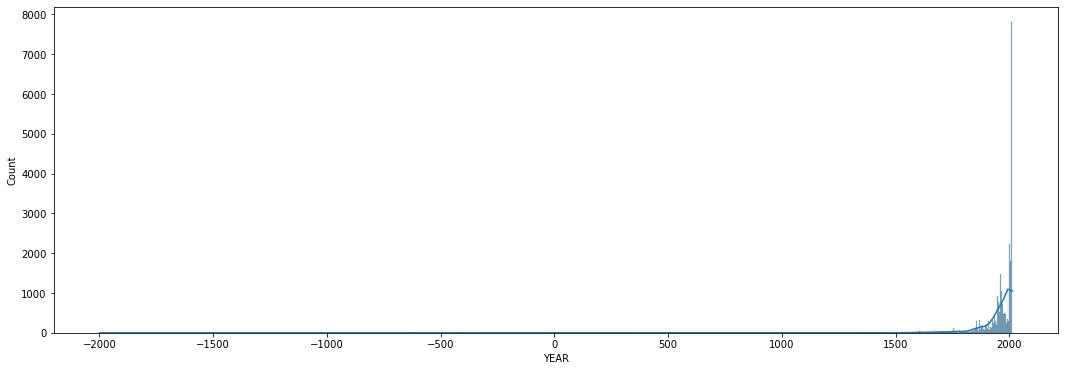

In [39]:
plt.figure(figsize=(18,6))
sns.histplot(data=tsunamis, x="YEAR",kde=True);

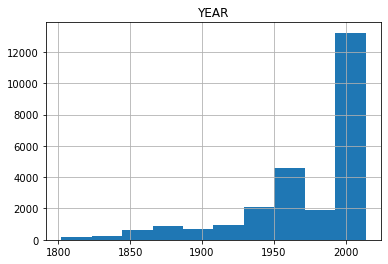

In [66]:
this_century = (tsunamis['YEAR']>1800)
temp3=tsunamis[this_century]
temp3[['YEAR','COUNTRY']].hist();

In [78]:

temp3[['YEAR']].value_counts().sort_index(ascending = False)

YEAR
2014     233
2013     203
2012     259
2011    6103
2010    1006
        ... 
1808       5
1806       5
1805       2
1804       8
1802      12
Length: 211, dtype: int64

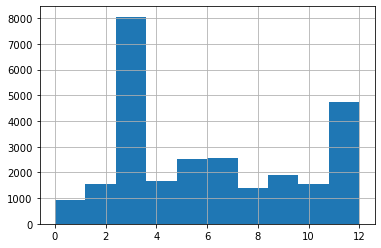

In [79]:
tsunamis['MONTH'].hist();


## Total Deaths ##

*For practical reasons I wil concentrate in data with less than 10,000 deaths which is where the mayority of data falls into. This also exclude NaN data*

In [44]:
less_than_10K_deaths = (tsunamis['DEATHS_TOT']<10000)
temp=tsunamis[less_than_10K_deaths];

<Figure size 1440x360 with 0 Axes>

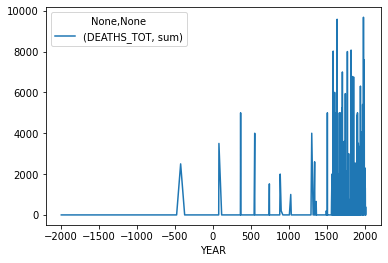

In [63]:
plt.figure(figsize=(20,5))
Deaths_by_Year=temp.groupby(['YEAR']).agg({'DEATHS_TOT':['sum']})
Deaths_by_Year.plot();

**Categorization of tsunamis depending on Total Deaths** 

I have categorized Tsunamis depending on the Total Deaths, in the following ranges: 
* *Mild* = les that 5 deaths
* *Medium* = between 5 and 100 deaths
* *Severe* = above 100 deaths

In [68]:
tsunamis['DEATHS_TOT'].isna().value_counts()

False    26824
Name: DEATHS_TOT, dtype: int64

In [83]:
extreme = (tsunamis['DEATHS_TOT']>1000) 
severe = (tsunamis['DEATHS_TOT'].between(101,1000))
medium = (tsunamis['DEATHS_TOT'].between(51,100))
mild = (tsunamis['DEATHS_TOT'].between(1,50))
tsunamis[severe]

,X,Y,FID,ID,TSEVENT_ID,YEAR,MONTH,DAY,DATE_STRIN,ARR_DAY,...,INJURIES_2,MISSING_TO,MISSING__1,MISSING__2,MAP_VOL_ID,HOUSES_D_5,HOUSES_D_6,HOUSES_D_7,NUM_DEPOSI,Earthquake Mayor/Great
987,98.000,0.009,4988,907,0,1861,3,9,1861/03/09,0,...,,0,0,,0,0,0,,0,NaN
989,94.500,2.000,4990,1349,0,1907,1,4,1907/01/04,0,...,,0,0,,0,0,0,,0,NaN
991,79.530,10.460,4992,5283,0,900,0,0,0900/??/??,0,...,,0,0,,0,0,0,,0,NaN
2908,-162.832,53.492,7909,1762,0,1946,4,1,1946/04/01,0,...,,0,0,,0,0,0,,7,NaN
2914,-172.095,-15.489,7915,4440,0,2009,9,29,2009/09/29,0,...,Few (~1 to 50 people),0,0,,0,0,0,,6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19897,140.680,42.070,17898,253,0,1640,7,31,1640/07/31,0,...,,0,0,,2676,0,0,,3,NaN
20975,141.500,35.000,21976,322,0,1677,11,4,1677/11/04,0,...,,0,0,,0,0,0,,0,NaN
24800,144.500,39.000,25801,233,0,1616,12,6,1616/12/06,0,...,,0,0,,0,0,0,,0,NaN
24826,144.000,38.500,25827,573,0,1793,2,17,1793/02/17,0,...,,0,0,,0,0,0,,0,NaN


In [87]:
extreme.value_counts()

False    26696
True       128
Name: DEATHS_TOT, dtype: int64

In [84]:
severe.value_counts()

False    26735
True        89
Name: DEATHS_TOT, dtype: int64

In [85]:
medium.value_counts()

False    26784
True        40
Name: DEATHS_TOT, dtype: int64

In [86]:

mild.value_counts()

False    26585
True       239
Name: DEATHS_TOT, dtype: int64

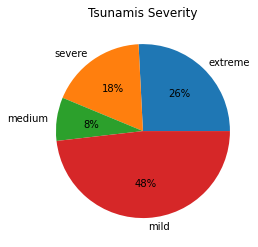

In [88]:
Range=['extreme','severe','medium','mild']
Range_values=[128,89,40,239]
fig, ax = plt.subplots()
ax.pie(Range_values,labels=Range, autopct='%1.0f%%')
ax.set_title('Tsunamis Severity');

In [80]:
tsunamis.groupby(['DEATHS_A_1','DEATHS_T_1'])['DEATHS_TOT'].count()

DEATHS_A_1  DEATHS_T_1                      
0                                               26206
1           Few (~1 to 50 people)                 270
2           Some (~51 to 100 people)               58
3           Many (~101 to 1000 people)            161
4           Very Many (~1001 or more people)      129
Name: DEATHS_TOT, dtype: int64

## Tsunami Intensity ##

Tsunami Intensity is The measure of strength, force, or energy. 
In this data, Intensity (I) is calculated according to the formula:

I= 1/2+ Log2 Hav where Hav is the water hight. For example:

* I = 4 for 11 meters
* I = 5 for 22.5 meters

The new scales Papadopoulus and Imamura includes 12 categories according to the effects on humans, on nature and objects, including vessels of variable size, and on buildings and other engineered constructions:

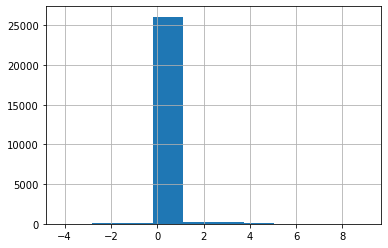

In [77]:

Tsunami_Intensity = tsunamis[~tsunamis['TS_INTENSI'].isnull()]
Tsunami_Intensity['TS_INTENSI'].describe()
tsunamis['TS_INTENSI'].hist();

## Maximum Water High (in meters) ##

The mayority of Tsunamis have a maximum water high between 0 and 10 meters, however the highest water level ever recorded was 500 m in Indonesia

In [112]:
Water_High_below10 = (tsunamis['Maximum Water Height (m)']<10)
temp=tsunamis[Water_High_below10]

KeyError: 'Maximum Water Height (m)'

In [111]:
temp['Maximum Water Height (m)'].hist()

KeyError: 'Maximum Water Height (m)'

In [25]:
Water_High_above200 = (tsunamis['Maximum Water Height (m)']>200)
temp=tsunamis[Water_High_above200]
temp[['Country', 'Year', 'Maximum Water Height (m)']]

,Country,Year,Maximum Water Height (m)
1132,INDONESIA,1930.0,500.0
1410,USA,1958.0,524.6
1467,ITALY,1963.0,235.0
1663,USA,1980.0,250.0


## Earthquake Magnitud ##

The most destructive tsunamis are generated from large, shallow earthquakes with an epicenter or fault line near or on the ocean floor. Usually, it takes an earthquake with a Richter magnitude exceeding 7.5 to produce a destructive tsunami.
For this example I have grouped Earthquake Maginute.

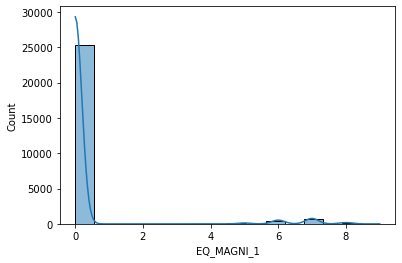

In [108]:
sns.histplot(data=tsunamis, x='EQ_MAGNI_1',kde=True);

In [27]:
Magnitud_below5 = tsunamis[(tsunamis['EQ_MAGNI_1']<4.9)].agg({'Maximum Water Height (m)':['mean']}) 
Magnitud_5to6 = tsunamis[(tsunamis['EQ_MAGNI_1'].between(5,5.9))].agg({'Maximum Water Height (m)':['mean']})
Magnitud_6to7 = tsunamis[(tsunamis['EQ_MAGNI_1'].between(6,6.9))].agg({'Maximum Water Height (m)':['mean']})
Magnitud_7to8 = tsunamis[(tsunamis['EQ_MAGNI_1'].between(7,7.9))].agg({'Maximum Water Height (m)':['mean']})
Magnitud_8to9 = tsunamis[(tsunamis['EQ_MAGNI_1'].between(8,8.9))].agg({'Maximum Water Height (m)':['mean']})
Magnitud_above9 = tsunamis[(tsunamis['EQ_MAGNI_1']>9)].agg({'Maximum Water Height (m)':['mean']})
Magnitud_above9


,Maximum Water Height (m)
mean,41.74


In [28]:
y=[1.67,0.9005,1.332688,3.683524,8.138469,41.74]
x=['Magnitud_below5','Magnitud_5to6','Magnitud_6to7','Magnitud_7to8','Magnitud_8to9','Magnitud_above9']


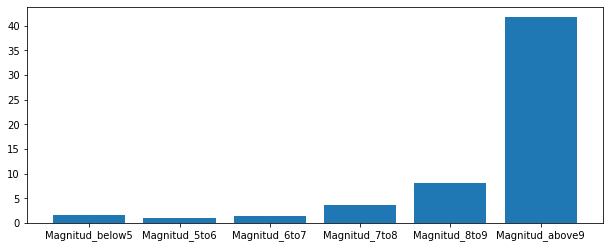

In [29]:
fig = plt.figure(figsize=(8, 3))
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.show()


array([[<AxesSubplot:title={'center':"('Total Deaths', 'sum')"}>]],
      dtype=object)

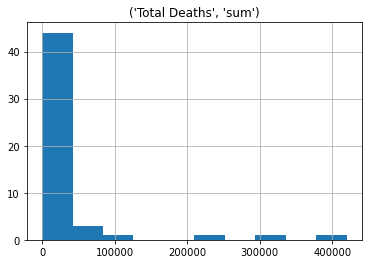

In [30]:
Magnitud=tsunamis.groupby(['Earthquake Magnitude']).agg({'Total Deaths':['sum']})
Magnitud.hist()

## Tsunamis by Country ##

Countries with the highest death toll by Tsunamis are  Haiti, Indonesia  and Japan.
Haiti catastrophic magnitude 7.0 Mw earthquake struck Haiti at 16:53 local time on Tuesday, 12 January 2010 and left a devasting death toll of 316,000.

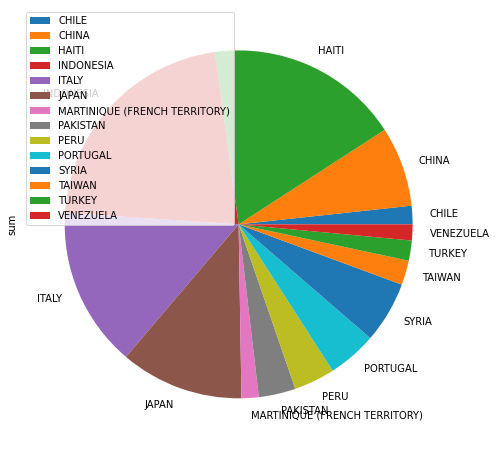

In [123]:
Deaths_by_Countries = (tsunamis['DEATHS_TOT']>25000)
temp=tsunamis[Deaths_by_Countries]

ctry=temp.groupby(['COUNTRY']).agg({'DEATHS_TOT':['sum']}).plot(kind='pie', y='DEATHS_TOT',figsize=(8, 8))
ctry;

In [120]:
Deaths_by_Countries = (tsunamis['DEATHS_TOT']>15000)
temp = tsunamis[Deaths_by_Countries]
temp[['COUNTRY','YEAR','DEATHS_TOT']].sort_values(by='DEATHS_TOT', ascending=False)


,COUNTRY,YEAR,DEATHS_TOT
7873,HAITI,2010,316000
993,INDONESIA,2004,227898
18996,JAPAN,1923,142807
3880,INDONESIA,1815,117000
6332,CHINA,2008,87652
12999,ITALY,1908,80000
6664,SYRIA,1033,70000
10340,PERU,1970,66794
12827,ITALY,1693,60000
12675,ITALY,1693,60000


Text(0.5, 1.0, 'Total Deaths by Countries with the highest death toll')

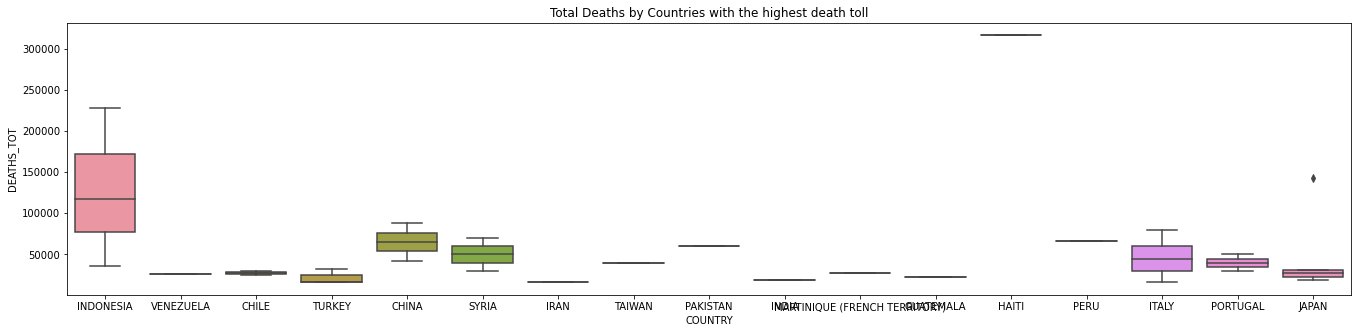

In [121]:
plt.figure(figsize=(23, 5))
sns.boxplot(x = "COUNTRY", y='DEATHS_TOT', data = temp)
plt.title("Total Deaths by Countries with the highest death toll")

## Deaths by Year ##

The most lethal years were 2010 (Haiti), 2004 (Indonesia), 1923 (Japan) & 2008 (China)

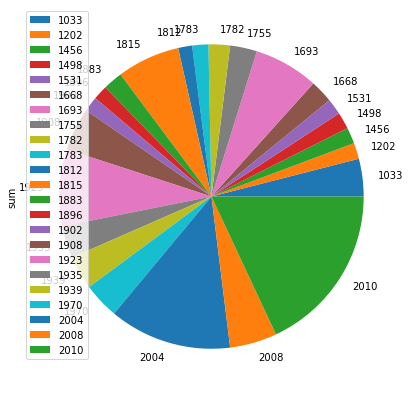

In [124]:
Deaths_by_Year = (tsunamis['DEATHS_TOT']>25000)
temp=tsunamis[Deaths_by_Year]

yr=temp.groupby(['YEAR']).agg({'DEATHS_TOT':['sum']}).plot(kind='pie', y='DEATHS_TOT',figsize=(7, 7))
yr;

<AxesSubplot:xlabel='Maximum Water Height (m)', ylabel='Count'>

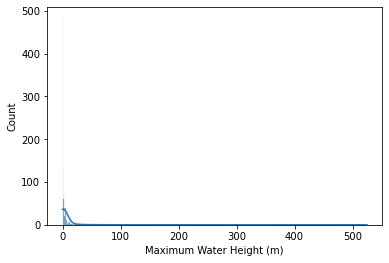

In [35]:
sns.histplot(data=tsunamis, x="Maximum Water Height (m)",kde=True);

## Locations ##

In [132]:
tsunamis[['LATITUDE', 'LONGITUDE', 'DEATHS_TOT']].describe()

,LATITUDE,LONGITUDE,DEATHS_TOT
count,26824.000000,26824.000000,26824.000000
mean,22.575620,53.642658,86.676409
std,24.524418,118.892077,3001.114806
min,-77.850000,-179.971000,0.000000
25%,5.633750,-72.184275,0.000000
50%,34.700000,132.958900,0.000000
75%,39.071315,141.506444,0.000000
max,70.250000,179.984000,316000.000000


In [133]:
temp = tsunamis[['LATITUDE', 'LONGITUDE','DEATHS_TOT']]
temp = temp.dropna()

my_zip = zip(temp['LATITUDE'], temp['LATITUDE'],temp['DEATHS_TOT'])
list_of_my_zip = list(my_zip)
list_of_my_zip[0:15]

[(5.283, 5.283, 0),
 (5.355, 5.355, 0),
 (5.436, 5.436, 0),
 (0.55, 0.55, 0),
 (4.15, 4.15, 0),
 (5.479, 5.479, 0),
 (5.572, 5.572, 0),
 (5.584, 5.584, 0),
 (5.571, 5.571, 0),
 (5.575, 5.575, 0),
 (5.593, 5.593, 0),
 (5.55, 5.55, 0),
 (5.562, 5.562, 0),
 (5.594, 5.594, 0),
 (5.588, 5.588, 0)]

In [134]:
from folium.plugins import HeatMap
folium_hmap = folium.Map(location=[39.728593,8.952292], 
                         zoom_start=1.5, blur=0,
                         tiles="OpenStreetMap")


In [135]:
folium_hmap.add_child(HeatMap(list_of_my_zip,
                              min_opacity=1,
                              radius = 10,
                              blur = 10))

## Correlations ##

In [40]:
tsunamis[['Earthquake Magnitude','Tsunami Intensity','Total Deaths','Maximum Water Height (m)','Tsunami Magnitude (Iida)','Total Missing','Total Injuries','Total Damage ($Mil)','Total Houses Destroyed','Total Houses Damaged','Earthquake Mayor/Great']].corr()

,Earthquake Magnitude,Tsunami Intensity,Total Deaths,Maximum Water Height (m),Tsunami Magnitude (Iida),Total Missing,Total Injuries,Total Damage ($Mil),Total Houses Destroyed,Total Houses Damaged,Earthquake Mayor/Great
Earthquake Magnitude,1.000000,0.164317,0.106148,0.142619,0.377296,0.120641,0.065445,0.154152,0.088886,0.389748,0.777869
Tsunami Intensity,0.164317,1.000000,0.149765,0.254667,0.876318,0.486530,0.115912,-0.393702,0.074430,-0.031075,0.012606
Total Deaths,0.106148,0.149765,1.000000,0.031011,0.128100,0.999839,0.769643,0.106251,0.299189,0.270261,0.035511
Maximum Water Height (m),0.142619,0.254667,0.031011,1.000000,0.302138,-0.085121,0.021245,0.034028,0.047185,0.247039,-0.017930
Tsunami Magnitude (Iida),0.377296,0.876318,0.128100,0.302138,1.000000,-0.155133,0.019523,-0.296394,0.081605,-0.022351,0.143069
Total Missing,0.120641,0.486530,0.999839,-0.085121,-0.155133,1.000000,0.788468,-0.236856,0.997508,0.786731,0.189080
Total Injuries,0.065445,0.115912,0.769643,0.021245,0.019523,0.788468,1.000000,0.267049,0.761761,0.285936,0.041342
Total Damage ($Mil),0.154152,-0.393702,0.106251,0.034028,-0.296394,-0.236856,0.267049,1.000000,0.332118,0.468655,0.016019
Total Houses Destroyed,0.088886,0.074430,0.299189,0.047185,0.081605,0.997508,0.761761,0.332118,1.000000,0.895153,0.078974
Total Houses Damaged,0.389748,-0.031075,0.270261,0.247039,-0.022351,0.786731,0.285936,0.468655,0.895153,1.000000,0.125294


## Clasification

In [41]:
temp2 = tsunamis.dropna(subset=['Tsunami Magnitude (Iida)','Total Deaths','Earthquake Magnitude'])

In [42]:
y=temp2['Earthquake Mayor/Great']
x=temp2[['Tsunami Magnitude (Iida)','Total Deaths','Earthquake Magnitude']]

In [43]:
#split the data in order to test it (in this case train it in 60% and test it on 40%):

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.4)

In [44]:
X_train

,Tsunami Magnitude (Iida),Total Deaths,Earthquake Magnitude
844,1.00,1000.0,8.8
1877,0.58,4.0,7.6
833,-1.00,57.0,7.0
1282,-1.30,2.0,7.3
1462,-2.30,15.0,7.3
...,...,...,...
762,3.60,2460.0,7.8
1797,1.60,1.0,6.8
1474,6.10,139.0,9.2
1879,2.32,8.0,7.6


In [45]:
losses = {}

In [46]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [47]:
lr.fit(X_train, y_train)

LogisticRegression()

In [48]:
lr.predict_proba(X_test)[:,1]

array([0.83370669, 0.98777952, 0.12046327, 0.99673768, 0.8542962 ,
       0.92297984, 0.97100725, 0.96149898, 0.84927502, 0.94409963,
       0.82645248, 0.57733177, 0.99726055, 0.9286308 , 0.98934164,
       0.80424424, 0.36360933, 0.96915775, 0.61772899, 0.98062964,
       0.96657437, 0.4033539 , 0.01981405, 0.05996307, 0.36378026,
       0.99757777, 0.39841233, 0.98590014, 0.46151486, 0.97921634,
       0.97921226, 0.89382761, 0.78407716, 0.85782039, 0.09263022,
       0.11806464, 0.05768807, 0.79601962, 0.72247469, 0.90349229,
       0.96262737, 0.99971976, 0.95202394, 0.71488691, 0.01773139,
       0.86991469, 0.85782259, 0.98516046, 0.00189126, 0.75491266,
       0.94978063, 0.94337063, 0.13272398, 0.99852564, 0.99457307,
       0.84748414, 0.3401617 , 0.9614927 , 0.88041825, 0.55202672,
       0.99267441, 0.86991315, 0.72174681, 0.94168883, 0.06134243,
       0.28009721, 0.97646357, 0.99531018, 0.32646423, 0.49369717,
       0.81994949, 0.97423729, 0.98751205, 0.9067209 , 0.99791

In [49]:
lr.predict(X_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [50]:
y_test

1520    1
1279    1
242     0
293     1
968     1
       ..
1343    1
1483    1
444     1
1284    1
705     1
Name: Earthquake Mayor/Great, Length: 77, dtype: int64

In [51]:
test_result = pd.DataFrame({'predicted_brob': lr.predict_proba(X_test)[:,1],'actual':y_test,'predicted':lr.predict(X_test)})
test_result

,predicted_brob,actual,predicted
1520,0.833707,1,1
1279,0.987780,1,1
242,0.120463,0,0
293,0.996738,1,1
968,0.854296,1,1
...,...,...,...
1343,0.987512,1,1
1483,0.906721,1,1
444,0.997918,1,1
1284,0.998697,1,1


In [52]:
test_result['correctly predicted']=(test_result['actual']==test_result['predicted'])
test_result

,predicted_brob,actual,predicted,correctly predicted
1520,0.833707,1,1,True
1279,0.987780,1,1,True
242,0.120463,0,0,True
293,0.996738,1,1,True
968,0.854296,1,1,True
...,...,...,...,...
1343,0.987512,1,1,True
1483,0.906721,1,1,True
444,0.997918,1,1,True
1284,0.998697,1,1,True


In [53]:
test_result['correctly predicted'].value_counts(normalize=True)

True     0.987013
False    0.012987
Name: correctly predicted, dtype: float64

**Accuracy Score**

Accuracy Score: accuracy of my predictions is 98.7%

In [54]:
from sklearn.metrics import accuracy_score
losses['Logistic'] = accuracy_score(y_test, lr.predict(X_test))
print(losses)

{'Logistic': 0.987012987012987}


## Linear Regression ##

Text(0.5, 0, 'Tsunami Magnitude (Iida)')

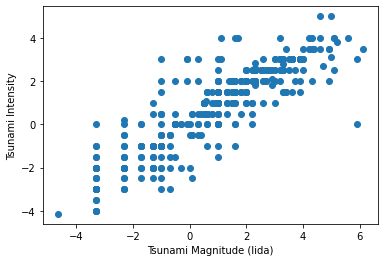

In [55]:
plt.scatter(tsunamis['Tsunami Magnitude (Iida)'], tsunamis['Tsunami Intensity'])
plt.ylabel('Tsunami Intensity')
plt.xlabel('Tsunami Magnitude (Iida)')


In [56]:
temp = tsunamis.dropna(subset=['Tsunami Magnitude (Iida)','Tsunami Intensity'])


In [57]:

x=temp[['Tsunami Magnitude (Iida)']]
y=temp['Tsunami Intensity']

In [58]:
#split the data in order to test it (in this case train it in 60% and test it on 40%):

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, shuffle=True)


In [59]:
X_train

,Tsunami Magnitude (Iida)
976,1.0
914,-1.0
230,1.0
1300,-0.7
1034,3.6
...,...
1480,-3.3
1574,0.8
1805,-3.3
273,4.3


In [60]:
pd.concat([X_train,y_train],axis=1)


,Tsunami Magnitude (Iida),Tsunami Intensity
976,1.0,2.0
914,-1.0,0.0
230,1.0,0.0
1300,-0.7,-1.0
1034,3.6,3.0
...,...,...
1480,-3.3,-2.0
1574,0.8,0.5
1805,-3.3,-2.0
273,4.3,4.0


In [61]:
pd.concat([X_test,y_test],axis=1)


,Tsunami Magnitude (Iida),Tsunami Intensity
1004,-2.3,-2.0
183,1.0,1.0
744,2.6,2.5
699,1.6,1.5
394,1.0,1.5
...,...,...
1203,1.5,2.0
345,2.2,0.0
1352,-1.0,-1.0
1328,1.5,2.0


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [63]:
print('alpha is',lr.intercept_)
print('beta is', lr.coef_)


alpha is 0.1560739002449369
beta is [0.75258544]


In [64]:
lr.predict(X_test)


array([-1.57487261,  0.90865934,  2.11279604,  1.3602106 ,  0.90865934,
        1.66124478,  2.11279604,  0.38184953,  0.98391788, -0.82228717,
       -0.59651154,  2.33857167,  0.60762516,  3.9190011 ,  3.99425964,
        1.51072769, -1.12332135, -0.22021882,  2.0375375 ,  0.60762516,
        0.75814225,  2.94064003,  1.66124478,  0.1560739 , -0.82228717,
       -1.57487261, -2.32745805,  0.90865934,  0.90865934,  1.66124478,
       -2.32745805,  0.90865934,  0.90865934,  2.63960585,  3.09115711,
       -1.57487261,  1.88702041,  3.09115711,  1.88702041, -2.32745805,
       -0.59651154, -0.59651154,  0.53236662,  0.90865934, -2.32745805,
        2.56434731,  0.53236662,  3.84374255, -1.57487261, -3.33592254,
        2.26331313,  2.11279604,  2.63960585,  3.46744983,  0.90865934,
       -0.22021882, -1.57487261,  0.90865934, -0.22021882,  1.28495206,
        1.3602106 , -2.32745805, -0.82228717,  2.86538148, -0.59651154,
        1.13443497,  0.90865934,  0.90865934,  2.18805459, -0.82

In [65]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, lr.predict(X_test))


0.714006204555621

C:\Users\imypo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\imypo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\imypo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tsunami Magnitude (Iida)', ylabel='Tsunami Intensity'>

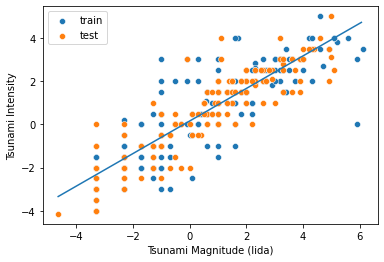

In [66]:
import numpy as np

x_range = np.arange(start=temp['Tsunami Magnitude (Iida)'].min(),stop=temp['Tsunami Magnitude (Iida)'].max(),step=0.1)
y_hat = lr.intercept_ + lr.coef_[0]*x_range
sns.scatterplot(X_train['Tsunami Magnitude (Iida)'], y_train, label='train')
sns.scatterplot(X_test['Tsunami Magnitude (Iida)'], y_test, label='test')
sns.lineplot(x_range,y_hat)
# plt.plot(y_hat, color='r')
# plt.legend()

## References

Kaggle: https://www.kaggle.com/ramjasmaurya/historical-data-of-tsunamis18002021

